In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df=pd.read_csv("economic.csv");
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [64]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [65]:
#checking null value 
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


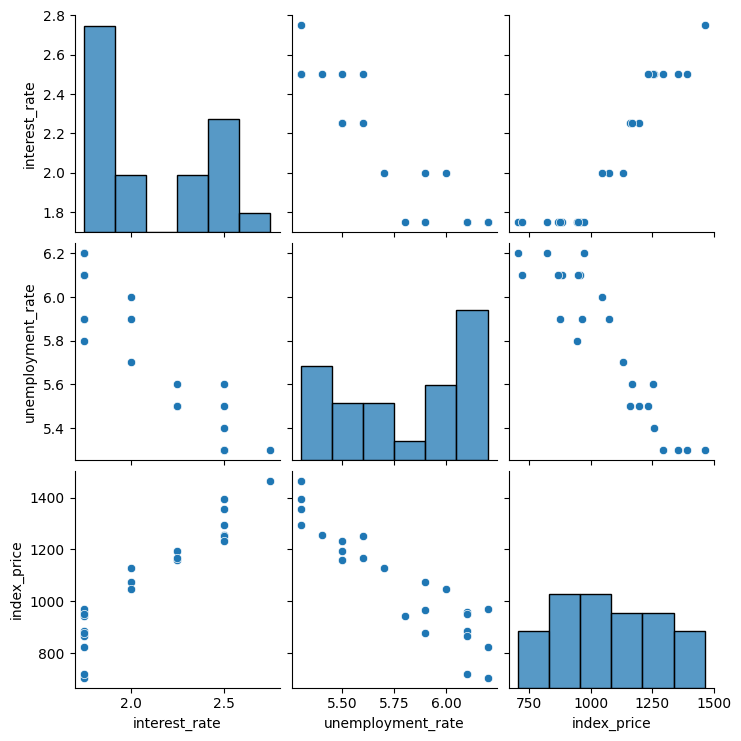

In [66]:
import seaborn as sns 
sns.pairplot(df)
df.corr()


Text(0, 0.5, 'umemployment_rate')

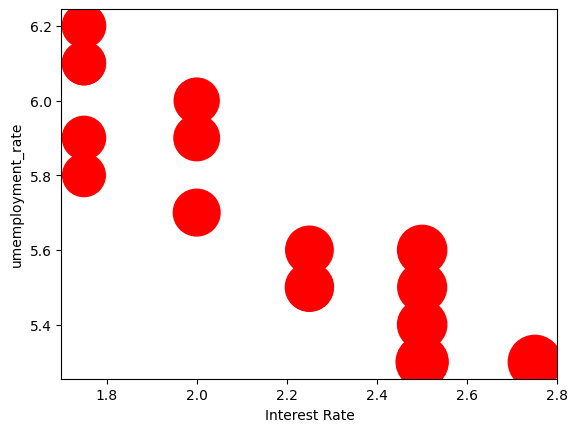

In [67]:
plt.scatter(df['interest_rate'],df['unemployment_rate'], df['index_price'] ,color='r')
plt.xlabel("Interest Rate")
plt.ylabel("umemployment_rate")


In [68]:
#independent features and dependent feature 
X=df[['interest_rate','unemployment_rate','index_price']]
Y=df.iloc[:,-1]
print(X)
print(Y)



    interest_rate  unemployment_rate  index_price
0            2.75                5.3         1464
1            2.50                5.3         1394
2            2.50                5.3         1357
3            2.50                5.3         1293
4            2.50                5.4         1256
5            2.50                5.6         1254
6            2.50                5.5         1234
7            2.25                5.5         1195
8            2.25                5.5         1159
9            2.25                5.6         1167
10           2.00                5.7         1130
11           2.00                5.9         1075
12           2.00                6.0         1047
13           1.75                5.9          965
14           1.75                5.8          943
15           1.75                6.1          958
16           1.75                6.2          971
17           1.75                6.1          949
18           1.75                6.1          884


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

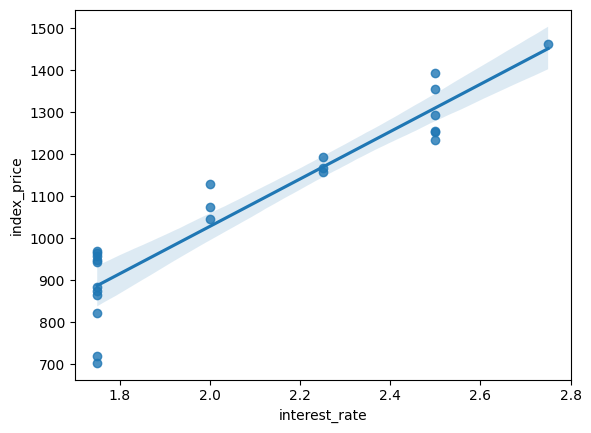

In [70]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])
#gives an estimate of the best fit line

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

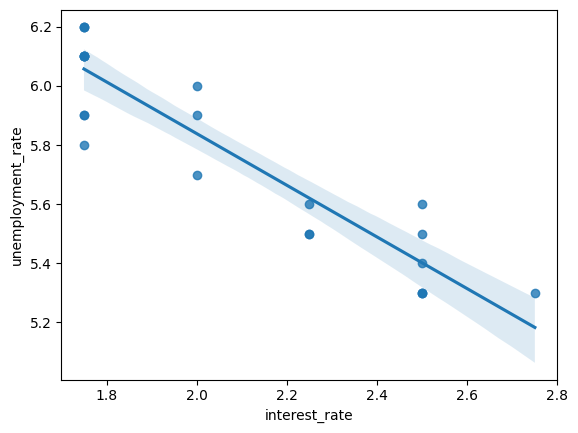

In [71]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])
#gives an estimate of the best fit line

In [72]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
print(X_train)
X_test=scaler.transform(X_test)
print(X_test)

[[-0.90115511  0.37908503 -0.41966146]
 [ 1.31077107 -1.48187786  1.6159075 ]
 [-0.90115511  1.30956648 -1.09818444]
 [ 1.31077107 -0.55139641  0.95161926]
 [ 1.31077107 -1.48187786  1.44034561]
 [-0.16384638  0.68924552 -0.03057835]
 [-0.90115511  0.999406   -0.45287587]
 [ 1.31077107 -1.48187786  1.13667099]
 [ 1.31077107 -1.17171738  0.96110909]
 [-0.90115511  1.30956648 -1.65808453]
 [-0.90115511  0.999406   -0.49558011]
 [-0.90115511  0.37908503 -0.84195898]
 [-0.90115511  0.999406   -1.58691079]
 [ 0.57346234 -0.8615569   0.67166922]
 [-0.16384638 -0.24123593  0.36324968]
 [-0.90115511  0.06892455 -0.52404961]
 [-0.90115511  0.999406   -0.88940814]
 [ 1.31077107 -0.8615569   0.85672094]]
[[ 0.57346234 -0.8615569   0.50085224]
 [-0.90115511  1.30956648 -0.39119196]
 [ 2.0480798  -1.48187786  1.94805162]
 [-0.90115511  0.999406   -0.80399965]
 [-0.16384638  0.37908503  0.1022793 ]
 [ 0.57346234 -0.55139641  0.53881157]]


In [73]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=3)
validation_score

array([-1.07705809e-26, -0.00000000e+00, -2.15411618e-27])

In [ ]:
#prediction 

Y_pred=modelimport numpy im.predict(X_test)
Y_pred

array([1159.,  971., 1464.,  884., 1075., 1167.])

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)
mae= mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R^2 Score: 1.0
